# Exercitiul #2
Vom implementa un model de regresie care prezice coordonatele unui obiect in spatiu 3D in functie de timp. Vom avea un singur feature si 3 label-uri.

Am ales o functie f(t), in care coordonatele unui obiect depind de timp in rumatorul mod:
$$
f(t) = (\frac{tsin(t)}{e^\frac{t}{10}}, \quad (t+1)\sqrt{cos(t) + 1}, \quad (2t-sin(t))cos(\frac{t}{3}))
$$

In [2]:
import math
import csv
%matplotlib ipympl

In [3]:
def f1(x):
    return (x * math.sin(x)) / math.exp(x/10)

def f2(x):
    return (x+1)*(math.sqrt(math.cos(x)+1))

def f3(x):
    return (2*x - math.sin(x)) * (math.cos(x/3))

In [4]:
xval = [i * 0.05 for i in range(20, int(100 / 0.05) + 1)] 
results = [(x, f1(x), f2(x), f3(x)) for x in xval]

In [5]:
with open("data.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(results)

print("Data generated.")

Data generated.


^ Pana acum doar am generat datele pentru model. Acum vom presupune ca nu mai stim cum au fost generate, si vom incerca sa antrenam modelul incat sa le prezica.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-07-09 11:55:10.759521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
columns = ["t", "x", "y", "z"]

rawDataset = pd.read_csv("./data.csv", names=columns, sep=",")
dataset = rawDataset.copy()
dataset.head()

,t,x,y,z
0,1.00,0.761394,2.482178,1.094760
1,1.05,0.820011,2.508693,1.157849
2,1.10,0.878211,2.531869,1.221794
3,1.15,0.935648,2.551614,1.286555
4,1.20,0.991973,2.567842,1.352082


In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t,1981.0,50.500000,28.600488,1.000000,25.750000,50.500000,75.250000,100.000000
x,1981.0,-0.000692,1.123293,-3.661546,-0.140643,-0.000310,0.164900,3.581578
y,1981.0,46.101670,36.012885,0.024671,15.223875,37.437754,71.490395,137.831473
z,1981.0,5.415001,80.657291,-169.879976,-48.003630,1.442320,58.735639,188.519239


In [9]:
for column in columns:
    dataset[column] = pd.to_numeric(dataset[column])
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

dataset.tail()

,t,x,y,z
1976,0.997980,0.505094,0.965937,0.319604
1977,0.998485,0.505120,0.975360,0.310625
1978,0.998990,0.505147,0.984183,0.301687
1979,0.999495,0.505175,0.992398,0.292792
1980,1.000000,0.505203,1.000000,0.283945


In [10]:
trainSet = dataset.sample(frac=0.8)
testSet = dataset.drop(trainSet.index)

In [11]:
trainFeatures = trainSet["t"]
testFeatures = testSet["t"]
trainLabels = trainSet.copy()
trainLabels.pop("t")
testLabels = testSet.copy()
testLabels.pop("t")

3       0.001515
8       0.004040
9       0.004545
13      0.006566
16      0.008081
          ...   
1965    0.992424
1973    0.996465
1974    0.996970
1975    0.997475
1978    0.998990
Name: t, Length: 396, dtype: float64

In [12]:
trainFeatures.head()

237     0.119697
1618    0.817172
1134    0.572727
1843    0.930808
790     0.398990
Name: t, dtype: float64

In [13]:
trainLabels.head()

,x,y,z
237,0.642868,0.140527,0.444490
1618,0.506200,0.845489,0.217613
1134,0.528218,0.505129,0.770199
1843,0.504489,0.824086,0.961712
790,0.538072,0.072021,0.607897


In [14]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(1,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(3)
])

2024-07-09 11:55:20.697106: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss="mean_absolute_error",
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 128)               3

In [17]:
%%time
history = model.fit(
    trainFeatures, trainLabels,
    validation_split = 0.2,
    epochs = 400
)

Epoch 1/400
40/40 [==============================] - 9s 59ms/step - loss: 0.2069 - val_loss: 0.1594
Epoch 2/400
40/40 [==============================] - 1s 36ms/step - loss: 0.1447 - val_loss: 0.1424
Epoch 3/400
40/40 [==============================] - 1s 32ms/step - loss: 0.1386 - val_loss: 0.1418
Epoch 4/400
40/40 [==============================] - 1s 32ms/step - loss: 0.1380 - val_loss: 0.1417
Epoch 5/400
40/40 [==============================] - 2s 39ms/step - loss: 0.1370 - val_loss: 0.1483
Epoch 6/400
40/40 [==============================] - 1s 35ms/step - loss: 0.1386 - val_loss: 0.1385
Epoch 7/400
40/40 [==============================] - 1s 26ms/step - loss: 0.1355 - val_loss: 0.1408
Epoch 8/400
40/40 [==============================] - 2s 38ms/step - loss: 0.1359 - val_loss: 0.1399
Epoch 9/400
40/40 [==============================] - 1s 27ms/step - loss: 0.1359 - val_loss: 0.1435
Epoch 10/400
40/40 [==============================] - 1s 33ms/step - loss: 0.1358 - val_loss: 0.1394

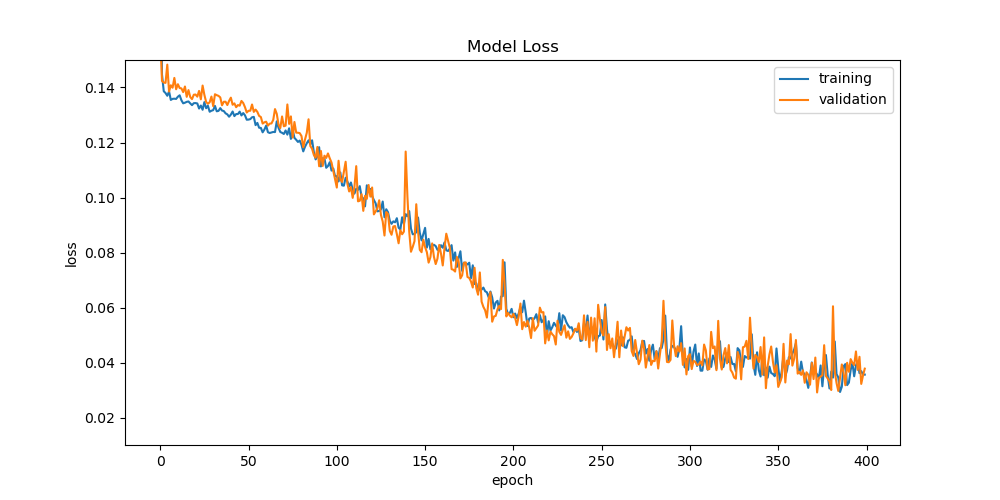

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training", "validation"])
plt.ylim(0.01, 0.150)
plt.show()

In [30]:
evaluation = model.evaluate(testFeatures, testLabels, verbose=2)
predictions = model.predict(testFeatures)
print(evaluation)
print(predictions)

13/13 - 0s - loss: 0.0380 - 143ms/epoch - 11ms/step
13/13 [==============================] - 0s 9ms/step
0.03799045458436012
[[0.6314744  0.00505475 0.476219  ]
 [0.6314744  0.00505475 0.476219  ]
 [0.6314744  0.00505475 0.476219  ]
 ...
 [0.5001352  0.58150476 0.8525601 ]
 [0.5001286  0.58198106 0.8524637 ]
 [0.5001088  0.5834099  0.852175  ]]


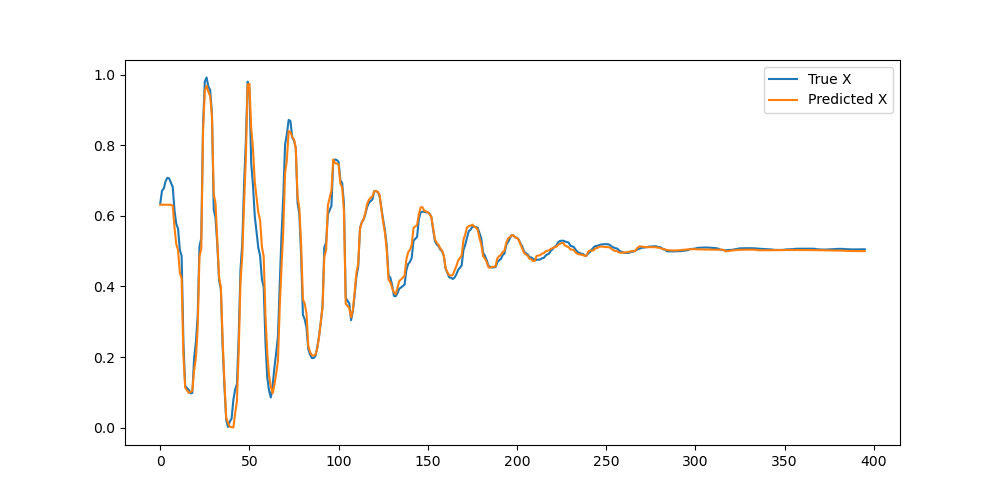

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 0], label='True X')
plt.plot(predictions[:, 0], label='Predicted X')
plt.legend()
plt.show()


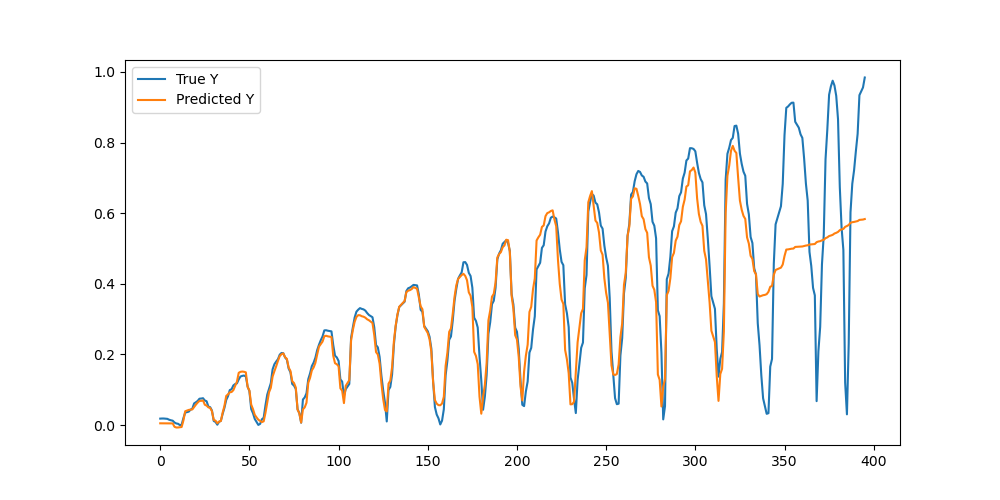

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 1], label='True Y')
plt.plot(predictions[:, 1], label='Predicted Y')
plt.legend()
plt.show()


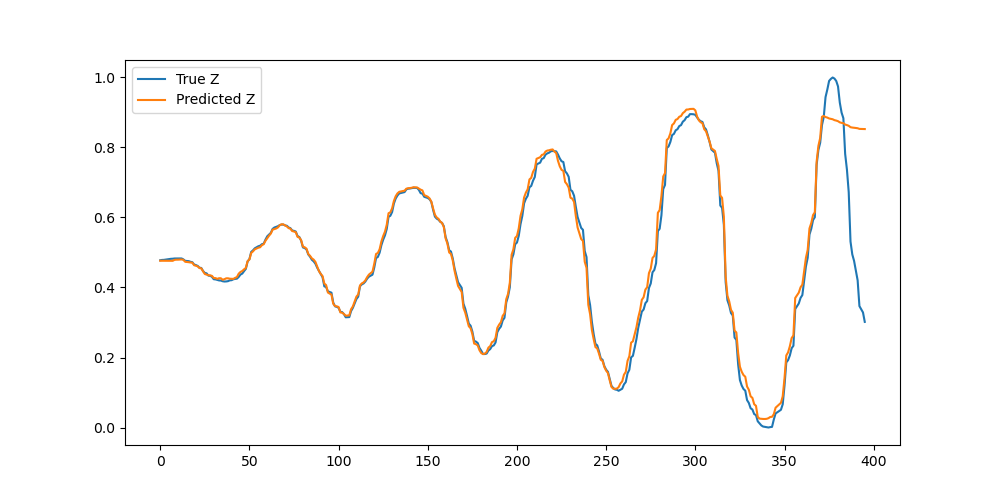

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 2], label='True Z')
plt.plot(predictions[:, 2], label='Predicted Z')
plt.legend()
plt.show()

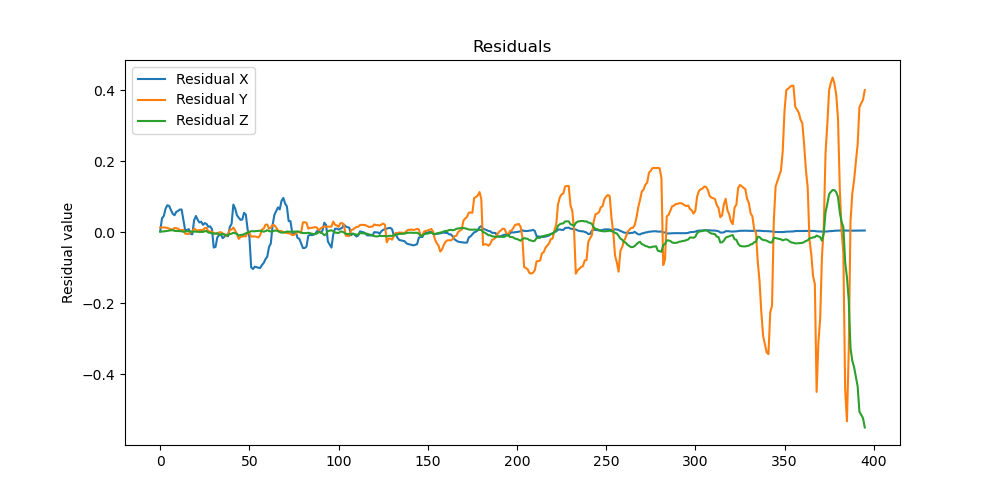

In [46]:
residuals = testLabels.values - predictions

plt.figure(figsize=(10, 5))
plt.plot(residuals[:, 0], label='Residual X')
plt.plot(residuals[:, 1], label='Residual Y')
plt.plot(residuals[:, 2], label='Residual Z')
plt.legend()
plt.title("Residuals")
plt.ylabel("Residual value")
plt.show()


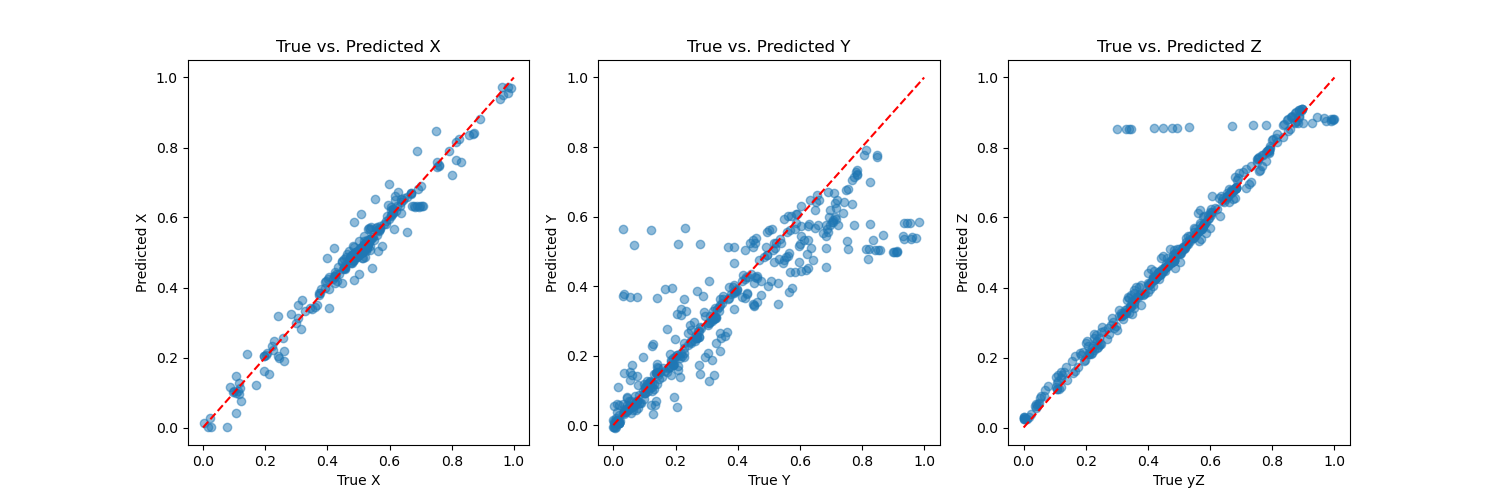

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(testLabels.values[:, 0], predictions[:, 0], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True X')
plt.ylabel('Predicted X')
plt.title('True vs. Predicted X')

plt.subplot(1, 3, 2)
plt.scatter(testLabels.values[:, 1], predictions[:, 1], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('True vs. Predicted Y')

plt.subplot(1, 3, 3)
plt.scatter(testLabels.values[:, 2], predictions[:, 2], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True yZ')
plt.ylabel('Predicted Z')
plt.title('True vs. Predicted Z')

plt.show()


In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


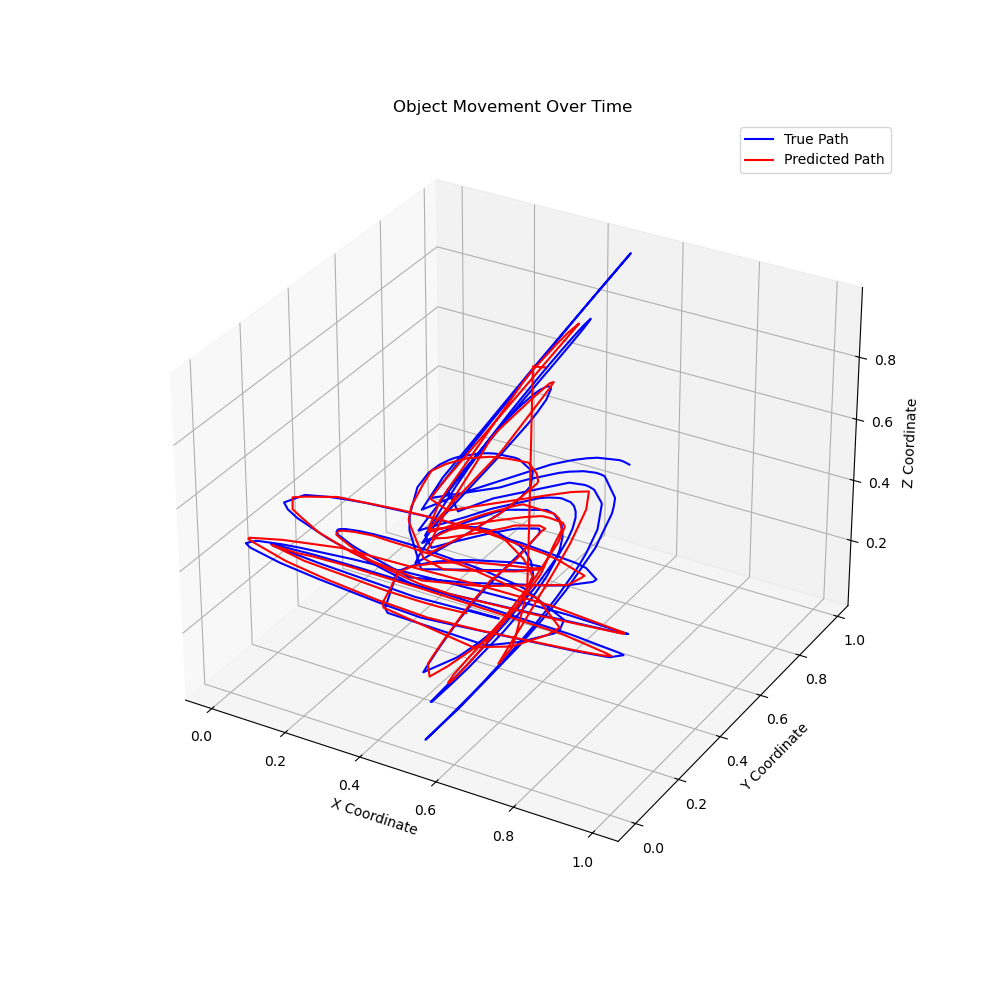

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(testLabels.values[:, 0], testLabels.values[:, 1], testLabels.values[:, 2], label='True Path', color='blue')

ax.plot(predictions[:, 0], predictions[:, 1], predictions[:, 2], label='Predicted Path', color='red')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('Object Movement Over Time')
ax.legend()

plt.show()